In [ ]:
/Users/jayeshbangar/Desktop/dataset/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv

In [3]:
!pip3 install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/de/ea/90267db2c02fb61f4d03b9645c7446d3cbca6d5c08522e889535c88edfcd/tensorflow-2.14.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.14.0 from https://files.pythonhosted.org/packages/d3/4b/ae9037ea22ba94eb2cf267e991384c3444f3e6142fa49923352b4ab73e14/tensorflow_macos-2.14.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.5 MB/s eta 0:00:00
  Obtaining dependency information for h5py>=2.9.0 from https://files.pythonhosted.org/packages/8d/70/2b0b99507287f66e71a6b2e66c5ad2ec2461ef2c534668eef96c3b48eb6d/h5py-3.10.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining de

In [5]:
!pip3 install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/13/94/f73d4efcc9a0272ea9f93c03f4744a2b709172309cd0bfde1e9012776330/xgboost-2.0.1-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [1]:
import numpy as np 
print(np.__version__)

1.25.2


In [7]:
import pandas as pd 

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
import math

import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dropout, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from tensorflow.keras import backend as K

    from imblearn.pipeline import Pipeline
    from imblearn.over_sampling import SMOTE
    from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_auc_score,roc_curve, f1_score

from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from keras.utils import plot_model
from sklearn.manifold import TSNE
from scipy.stats import randint, uniform
sns.set_style("whitegrid")

In [8]:
df1=pd.read_csv("/Users/jayeshbangar/Desktop/dataset/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("/Users/jayeshbangar/Desktop/dataset/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("/Users/jayeshbangar/Desktop/dataset/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("/Users/jayeshbangar/Desktop/dataset/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("/Users/jayeshbangar/Desktop/dataset/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("/Users/jayeshbangar/Desktop/dataset/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("/Users/jayeshbangar/Desktop/dataset/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("/Users/jayeshbangar/Desktop/dataset/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")

In [9]:
df = pd.concat([df1,df2])
df = pd.concat([df,df3])
df = pd.concat([df,df4])
df = pd.concat([df,df5])
df = pd.concat([df,df6])
df = pd.concat([df,df7])
df = pd.concat([df,df8])
del df1,df2,df3,df4,df5,df6,df7,df8

In [10]:
len(df)
df.sample(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
221074,443,4180782,5,1,123,46,46,0,24.600000,23.276598,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
358342,33034,49,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
665980,53,61015,2,2,92,312,46,46,46.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
108782,80,9735167,7,5,50,11607,20,0,7.142857,6.094494,...,20,1720271.0,0.0,1720271,1720271,6887022.0,0.0,6887022,6887022,DDoS
87939,53,72740,2,2,62,216,31,31,31.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
53872,53,156,2,2,80,112,40,40,40.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
143144,53,61050,2,2,60,264,30,30,30.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
204546,80,85406324,8,7,413,11595,407,0,51.625000,143.608533,...,20,4.0,0.0,4,4,84200000.0,0.0,84200000,84200000,DoS Hulk
377518,443,1,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
679636,53,263,2,2,70,264,35,35,35.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [11]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2827876 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max               

In [14]:
y_tmp=df[' Label'].values
x=df.drop([' Label'], axis=1).values

del df 
!free

zsh:1: command not found: free


In [15]:
sizes=[]
labels=[]

for i in Counter(y_tmp):
    tmp=str(i)+' - '+str(Counter(y_tmp)[i])
    labels.append(tmp)
    sizes.append(Counter(y_tmp)[i])

/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


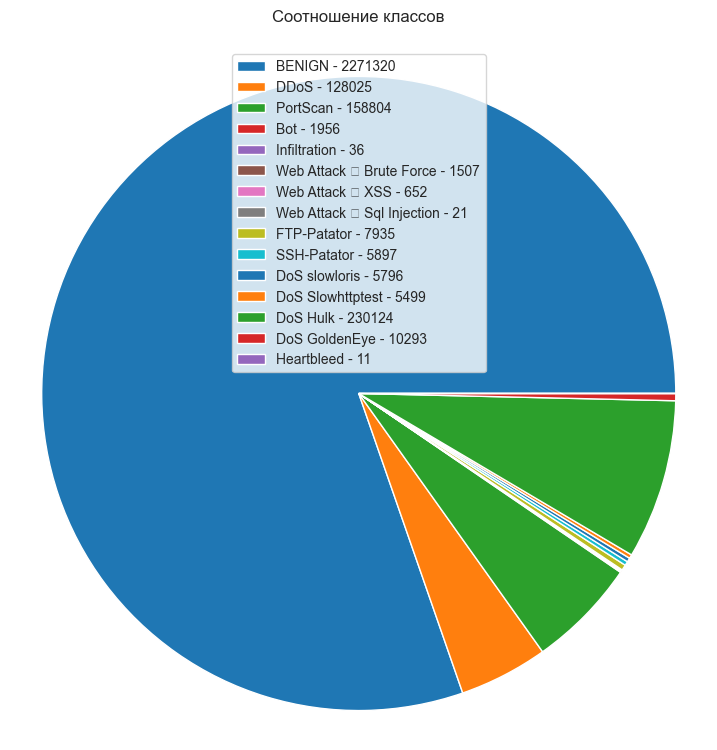

In [16]:
fig1, ax1 = plt.subplots(figsize = (9, 9))
ax1.pie(sizes,  labels = None) # 
ax1.axis('equal')  
plt.title('Соотношение классов\n')
plt.legend(labels)
plt.show()

## Undersampling and oversampling

In [17]:
sampling_strategy_over = {
    "DoS GoldenEye": 11000, 
    "FTP-Patator": 11000, 
    "DoS slowloris": 10000, 
    "DoS Slowhttptest": 10000, 
    "SSH-Patator": 10000, 
    "Bot": 5000, 
    "Web Attack � Brute Force": 5000, 
    "Web Attack � XSS": 2000, 
    "Infiltration": 2000, 
    "Web Attack � Sql Injection": 2000, 
    "Heartbleed": 2000}

sampling_strategy_under = {
    "BENIGN": 15000 ,
    "DoS Hulk": 8000, 
    "DDoS": 8000,
    "PortScan": 8000, }

over = SMOTE(sampling_strategy=sampling_strategy_over)
under = RandomUnderSampler(sampling_strategy=sampling_strategy_under)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

x_bal, y_bal = pipeline.fit_resample(x, y_tmp)

/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


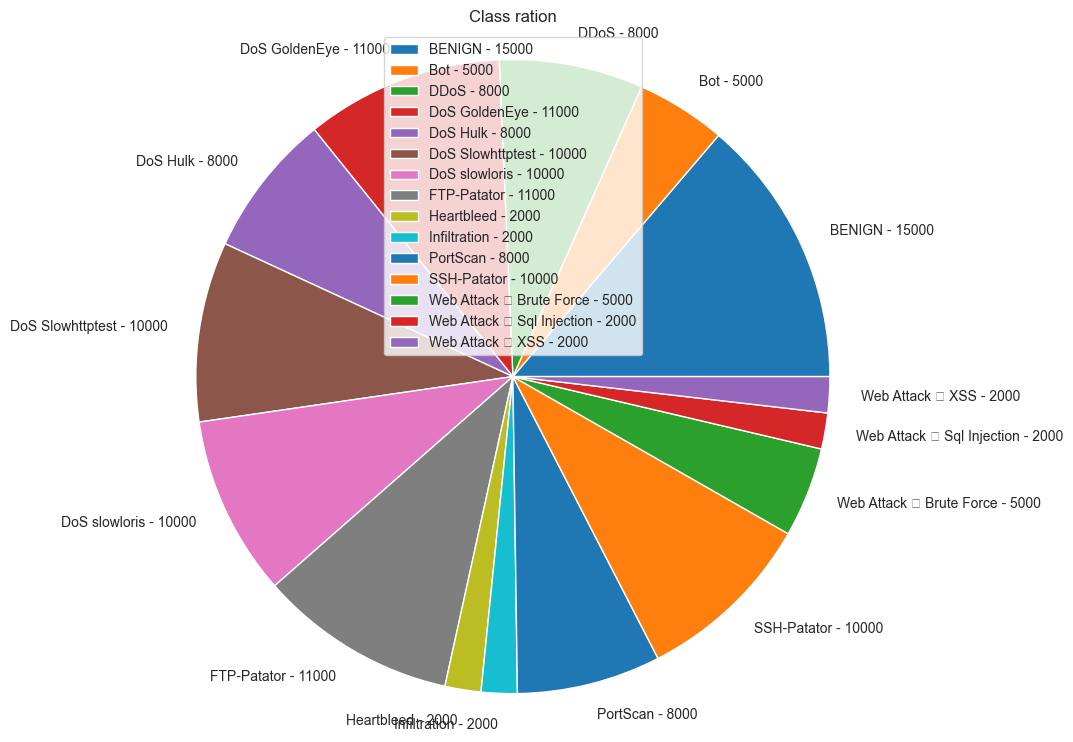

In [18]:
sizes=[]
labels=[]

for i in Counter(y_bal):
    tmp=str(i)+' - '+str(Counter(y_bal)[i])
    labels.append(tmp)
    sizes.append(Counter(y_bal)[i])
    
fig1, ax1 = plt.subplots(figsize = (9, 9))
ax1.pie(sizes,  labels = labels)
ax1.axis('equal')
plt.title('Class ration')
plt.legend()
plt.show()

In [19]:
x_scaled = StandardScaler().fit_transform(x_bal)

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y_bal,test_size=0.2,random_state=42, stratify=y_bal)

print('===========x_train=============', x_train.shape)
print('===========x_test==============', x_test.shape)

===========x_train============= (87200, 78)
===========x_test============== (21800, 78)


In [20]:
labels=np.unique(y_train)

classes = []
for i in range(0,len(labels)):
    classes.append(i)

map=dict(zip(labels,classes))
print(map)

y_train_class=[]
for i in range(0, len(y_train)):
    y_train_class.append(map[y_train[i]])
y_train=np.asarray(y_train_class)


'''Test sample processing'''

y_test_class=[]
for i in range(0, len(y_test)):
    y_test_class.append(map[y_test[i]])    
y_test=np.asarray(y_test_class)

{'BENIGN': 0, 'Bot': 1, 'DDoS': 2, 'DoS GoldenEye': 3, 'DoS Hulk': 4, 'DoS Slowhttptest': 5, 'DoS slowloris': 6, 'FTP-Patator': 7, 'Heartbleed': 8, 'Infiltration': 9, 'PortScan': 10, 'SSH-Patator': 11, 'Web Attack � Brute Force': 12, 'Web Attack � Sql Injection': 13, 'Web Attack � XSS': 14}


In [21]:
del x_scaled,x_bal,y_bal
!free

zsh:1: command not found: free


In [22]:
def show_result(y_true,y_pred):
    """Outputs a classification report and error matrix"""
    print(classification_report(y_true,y_pred))
    plt.figure(figsize = (10,8))
    sns.heatmap(metrics.confusion_matrix(y_true, y_pred), annot = True, fmt = 'd', cmap='crest')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [26]:
input_layer = Input(shape=(78,))

branch1 = Dense(64, activation='relu')(input_layer)
branch1 = Dense(32, activation='relu')(branch1)

branch2 = Dense(256, activation='relu')(input_layer)
branch2 = Dropout(0.2)(branch2)
branch2 = Dense(64)(branch2) 
#branch2 = Dropout(0.2)(branch2)
branch2 = Dense(32, activation='relu')(branch2)

branch3 = Dense(512, activation='relu')(input_layer)
branch3 = Dense(128, activation='relu')(branch3)
branch3 = Dense(32, activation='relu')(branch3)

merged = tf.keras.layers.concatenate([branch1, branch2, branch3])

output_layer = Dense(15, activation='softmax')(merged)
model = Model(inputs=input_layer, outputs=output_layer) 

model.compile(optimizer=Adam(learning_rate=0.0006),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

class_weights = compute_class_weight(class_weight = "balanced", classes = np.unique(y_train), y = y_train) 
class_weights = dict(zip(np.unique(y_train), class_weights))

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=100)

model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

Epoch 1/50
872/872 [==============================] - 3s 3ms/step - loss: 0.3302 - accuracy: 0.9026 - val_loss: 0.1801 - val_accuracy: 0.9443
Epoch 2/50
872/872 [==============================] - 2s 2ms/step - loss: 0.1745 - accuracy: 0.9428 - val_loss: 0.1586 - val_accuracy: 0.9476
Epoch 3/50
872/872 [==============================] - 2s 2ms/step - loss: 0.1547 - accuracy: 0.9475 - val_loss: 0.1443 - val_accuracy: 0.9512
Epoch 4/50
872/872 [==============================] - 2s 2ms/step - loss: 0.1471 - accuracy: 0.9498 - val_loss: 0.1405 - val_accuracy: 0.9522
Epoch 5/50
872/872 [==============================] - 2s 3ms/step - loss: 0.1401 - accuracy: 0.9522 - val_loss: 0.1357 - val_accuracy: 0.9539
Epoch 6/50
872/872 [==============================] - 2s 3ms/step - loss: 0.1376 - accuracy: 0.9528 - val_loss: 0.1364 - val_accuracy: 0.9515
Epoch 7/50
872/872 [==============================] - 2s 2ms/step - loss: 0.1311 - accuracy: 0.9544 - val_loss: 0.1357 - val_accuracy: 0.9528
Epoch 

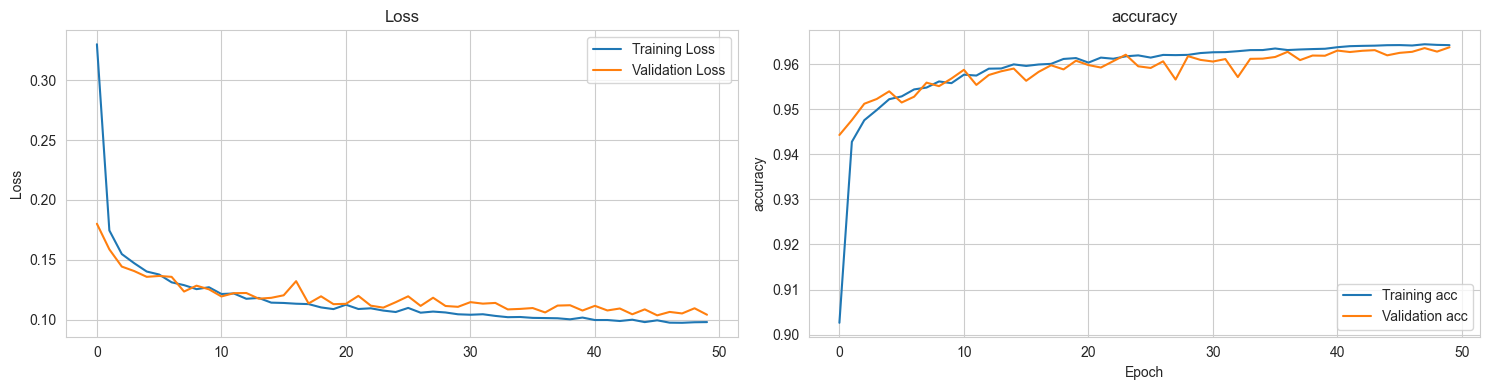

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.legend()
plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')

plt.tight_layout()
plt.show()

682/682 [==============================] - 0s 437us/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      3000
           1       0.97      1.00      0.98      1000
           2       0.99      1.00      1.00      1600
           3       0.99      1.00      1.00      2200
           4       0.98      0.99      0.99      1600
           5       0.99      1.00      1.00      2000
           6       0.99      0.99      0.99      2000
           7       1.00      1.00      1.00      2200
           8       1.00      1.00      1.00       400
           9       0.99      1.00      0.99       400
          10       0.97      1.00      0.98      1600
          11       0.90      1.00      0.95      2000
          12       0.71      0.94      0.81      1000
          13       0.99      0.64      0.78       400
          14       0.93      0.06      0.12       400

    accuracy                           0.96     21800
   macro avg       0.96

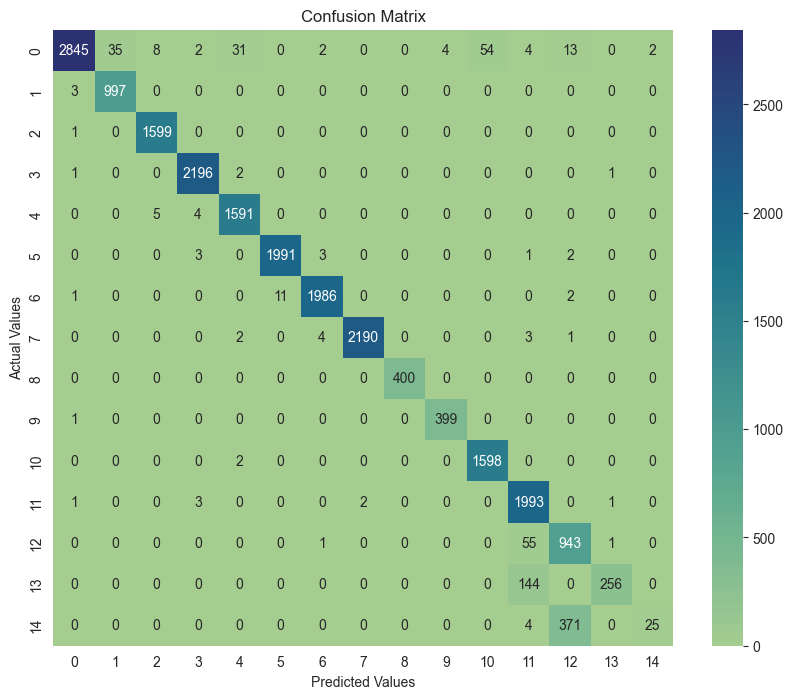

In [28]:
tmp=model.predict(x_test)

pred=[]
for i in range(0,len(tmp)):
    max=np.amax(tmp[i])
    for k in range(0,len(tmp[i])):
        if (tmp[i][k]==max):
            pred.append(k)
preds=np.asarray(pred)

show_result(y_test,preds)

In [29]:
f_score_1, f_score_2, f_score_3 = 0.97, 0.97, 0.89
mean_f=((f_score_1+f_score_2+f_score_3)/3)*100
print('F-measures obtained during training:', f_score_1, f_score_2, f_score_3)
print('Average F-measure', (f_score_1+f_score_2+f_score_3)/3)

res = min(math.floor(mean_f-71),22)
if(res<0): res=0

print('Number of points:', res)

F-measures obtained during training: 0.97 0.97 0.89
Average F-measure 0.9433333333333334
Number of points: 22
